## <i> <center> DEWANK MAHAJAN (TASK - 2) </i> </center>
### <center>Supervised Learning performing Linear Regression with Python SkLearn</center>
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions.
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing essential libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing Data into DFrame
data = pd.read_csv("http://bit.ly/w-data")
print("Imported Data")

# Print All Data Points
data.head(25)

Imported Data


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# <center> Visualizations </center> 
* Let's plot our data points on 2-D graph to identify relations in our dataset.
* We can create the plot with the following script:

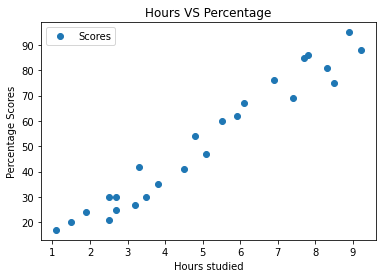

In [3]:
data.plot(x = "Hours", y = "Scores", style = 'o' )
plt.xlabel('Hours studied')
plt.ylabel('Percentage Scores')
plt.title('Hours VS Percentage')
plt.show()

### The data points depict an upward trend in data, its a Positive Linear Relationship:

# <center> Preparing Data </center> 
Divide data into :- 
* attributes(Input)  --X 
* labels(Output)     --y

In [4]:
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [5]:
# Train-Test Split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0 )

## <center> Training the Algorithm </center>
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Regressor")

Regressor


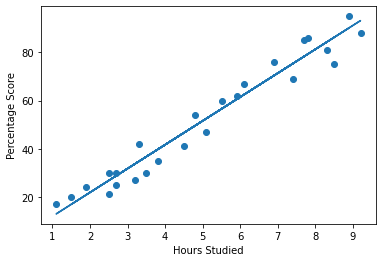

2.018160041434683
[9.91065648]


In [13]:
# Plotting the Regression Line
line = regressor.coef_*X + regressor.intercept_

# Plotting for Test-Data
plt.scatter(X, y)
plt.plot(X, line)
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

# print the coefficients
print(regressor.intercept_)
print(regressor.coef_)

## <center> Making Predictions </center> 


In [14]:
print(X_test)
# Training Data - in Hours
y_pred = regressor.predict(X_test)
# Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [15]:
# Comparing Actual Vs Predicted
d_frame = pd.DataFrame({"Actual": y_test,"Predicted": y_pred})
d_frame

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [28]:
# You can also test with your own data
hours = float(input('Hours = '))
own_pred = regressor.predict(np.array([hours]).reshape(-1, 1))
print("Predicted Score = {}".format(own_pred[0]))

Hours =  9


Predicted Score = 91.21406836721481


## <center> Evaluating the model </center>
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square erro

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:
$$\frac{1}{n}\sum_{i=1}^{n} \left |y_i - \hat{y_i} \right |$$

Mean Squared Error (MSE) is the mean of the squared errors:
$$\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2$$

Root Mean Squared Error (RMSE) is the mean of the squared errors:
$$\sqrt{\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2}$$

In [30]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test,  y_pred)))
print("R^2: ", r2_score(y_test,  y_pred))

Mean Absolute Error: 4.183859899002975
RMSE : 4.6474476121003665
R^2:  0.9454906892105356
